<a href="https://colab.research.google.com/github/ppug15510-jpg/Exercise_2025/blob/main/188opencv2_189matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#188 opencv를 활용하여 마우스로 도형 그리기 2
import cv2
import numpy as np
from random import shuffle
from math import sqrt

B = [i for i in range(256)] #Blue
G = [i for i in range(256)] #Green
R = [i for i in range(256)] #Red

mode = True #직사각형, 원 그리기 토글 플래그
is_drawing = False #그리기 플래그
ix, iy = -1, -1 #마우스 왼쪽 버튼을 누른 위치

In [3]:
def onMouse(event, x, y, flags, param):
    global ix, iy, is_drawing, mode, B, G, R

    if event == cv2.EVENT_LBUTTONDOWN:
        is_drawing = True
        ix, iy = x, y
        shuffle(B), shuffle(G), shuffle(R)

    elif event == cv2.EVENT_MOUSEMOVE:
        if is_drawing:
            if mode:
                cv2.rectangle(param, (ix, iy), (x, y), [B[0], G[0], R[0]], -1)
            else:
                r = int((ix-x)**2 + (iy-y)**2)
                r = int(sqrt(r))
                cv2.circle(param, (ix, iy), r, [B[0], G[0], R[0]], -1)

    elif event == cv2.EVENT_LBUTTONUP:
        is_drawing = False

In [ ]:
def mouseBrush():
    global mode
    img = np.zeros((576, 1024, 3), np.uint8)
    cv2.namedWindow('drawing pad')
    cv2.setMouseCallback('drawing pad', onMouse, img)

    while True:
        cv2.imshow('drawing pad', img)
        k = cv2.waitKey(1) & 0xFF
        if k == 27:
            break

        if k == ord('m'):
            mode = not mode

    cv2.destroyAllWindows()

mouseBrush()

In [1]:
#189 matplotlib을 활용한 데이터 시각화 실습 1
import matplotlib
print(matplotlib.matplotlib_fname())
print(matplotlib.get_cachedir())

/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/matplotlibrc
/root/.cache/matplotlib


In [2]:
import matplotlib.pyplot as plt
import math

In [3]:
krfont = {'family':'NanumGothic', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
PI = 3.141592
xs, ys1, ys2 = [], [], []
for x in range(360):
    xs.append(x)
    ys1.append(math.sin(PI*x/180))
    ys2.append(math.cos(PI*x/180))

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54632 (\N{HANGUL SYLLABLE HAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

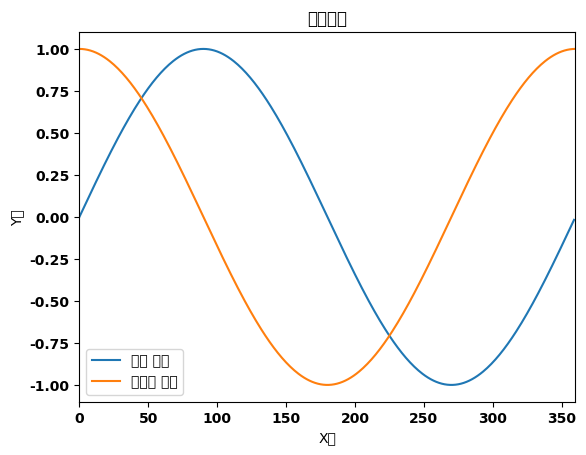

In [5]:
plt.plot(xs, ys1, label='사인 곡선')
plt.plot(xs, ys2, label='코사인 곡선')
plt.xlim(0, 360)
plt.xlabel('X값')
plt.ylabel('Y값')
plt.title('삼각함수')
plt.legend()
plt.show()

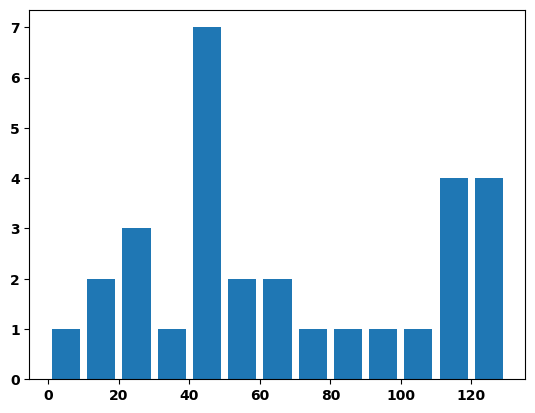

In [6]:
data = [22, 55, 62, 45, 21, 22, 34, 42, 42, 4, 99, 102, 110, 120, 121,
        122, 130, 111, 115, 112, 80, 75, 65, 54, 44, 43, 42, 48, 16, 11]
bins = [x*10 for x in range(14)]

plt.hist(data, bins, rwidth=0.8)
plt.show()